[Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703)

In [ ]:
import pandas as pd
import numpy as np

## 1. 데이터 정리

#### 1.1 데이터 적재

In [ ]:
# Porto 데이터셋의 결측값은 -1로 되어있으므로 -1 을 np.Nan과 같은 값으로 변환
train_data = pd.read_csv('/content/train.csv', na_values=['-1', '-1.0'])
test_data = pd.read_csv('/content/test.csv', na_values=['-1', '-1.0'])

#### 1.2 데이터 확인

In [ ]:
train_data.shape

(595212, 59)

In [ ]:
test_data.shape

(892816, 58)

* 테스트 데이터가 훈련 데이터보다 훨씬 많이 있음.

In [ ]:
train_data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


#### 1.3 결측값 확인

* 널 값 개수 확인하기
    * Porto Seguro 데이터셋은 초기에 결측값을 -1로 기록되어 있었지만, CSV를 읽어올 때 미리 -1 값을 np.Nan 값으로 바꿔놨음

In [23]:
train_data.shape[0] - train_data.count()    # shape[0]에 전체 행 데이터 갯수 저장되어 있다는 점 이용(값을 가진 데이터 개수를 빼주면 널 값의 개수 확인 가능)

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


* 칼럼 당 결측값의 개수

In [ ]:
vars_with_missing = []

for f in train_data.columns :
    missings = np.count_nonzero(train_data[f].isnull())
    if missings > 0 :
        vars_with_missing.append(f)
        missings_perc = missings/train_data.shape[0]
        
        print(f"{f}칼럼은 {missings}개의 결측값이 있습니다. {missings_perc:.2%}")
        

print(f"전체 {len(vars_with_missing)}개의 칼럼에서 결측값이 발견됐습니다.")

ps_ind_02_cat칼럼은 216개의 결측값이 있습니다. 0.04%
ps_ind_04_cat칼럼은 83개의 결측값이 있습니다. 0.01%
ps_ind_05_cat칼럼은 5809개의 결측값이 있습니다. 0.98%
ps_reg_03칼럼은 107772개의 결측값이 있습니다. 18.11%
ps_car_01_cat칼럼은 107개의 결측값이 있습니다. 0.02%
ps_car_02_cat칼럼은 5개의 결측값이 있습니다. 0.00%
ps_car_03_cat칼럼은 411231개의 결측값이 있습니다. 69.09%
ps_car_05_cat칼럼은 266551개의 결측값이 있습니다. 44.78%
ps_car_07_cat칼럼은 11489개의 결측값이 있습니다. 1.93%
ps_car_09_cat칼럼은 569개의 결측값이 있습니다. 0.10%
ps_car_11칼럼은 5개의 결측값이 있습니다. 0.00%
ps_car_12칼럼은 1개의 결측값이 있습니다. 0.00%
ps_car_14칼럼은 42620개의 결측값이 있습니다. 7.16%
전체 13개의 칼럼에서 결측값이 발견됐습니다.


- 삭제할 칼럼(결측값이 너무 많은 칼럼) : **ps_car_03_cat**, **ps_car_05_cat**  
- 삭제할 칼럼(결과에 지장을 주지 않는 칼럼) : **id**
- 고려해야할 칼럼 : **ps_reg_03**

#### 1.4 통계치 확인

In [ ]:
train_data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 1.5 타겟값의 빈도수 확인

In [ ]:
train_data["target"].value_counts()

0    573518
1     21694
Name: target, dtype: int64

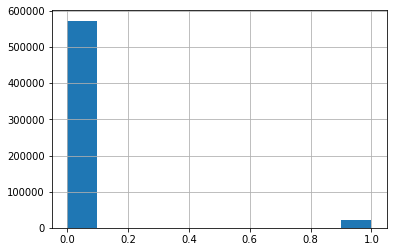

In [ ]:
train_data["target"].hist()

- 타겟값의 심한 불균형
    - 해결방안 2가지
        - 1. target 1 -> Oversampling
        - 2. target 0 -> Undersampling

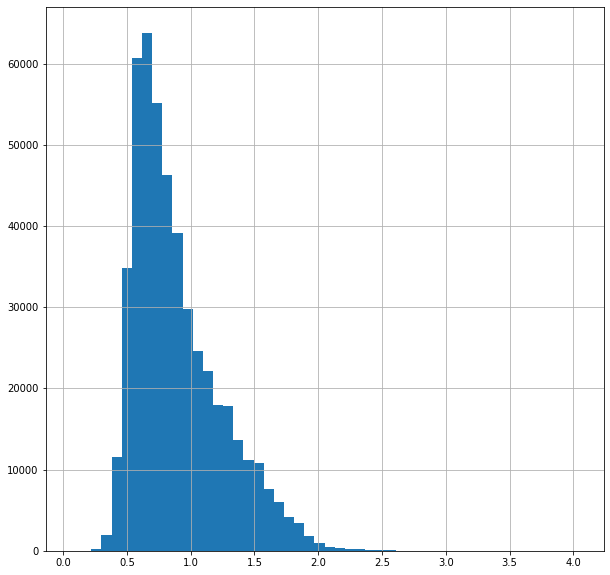

In [ ]:
fig = train_data['ps_reg_03'].hist(bins=50, figsize = (10,10))

## Under Sampling

훈련 데이터의 타겟 칼럼을 값에 따라 분리

In [ ]:
train_target1 = train_data[train_data['target'] == 1 ]

In [ ]:
train_target0 = train_data[train_data['target'] == 0 ]

타겟 칼럼의 0인 값들이 1인 값들의 개수와 같아지도록 Under Sampling 진행

In [ ]:
train_target0_sample = train_target0.sample(n=21694, replace = False)

분리해놨던 값들을 다시 한 칼럼으로 합치기

In [ ]:
frames = [train_target1,train_target0_sample]
new_train_data = pd.concat(frames)
new_train_data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1.0,2,0.0,0.0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
19,64,1,0,1.0,2,1.0,0.0,1,0,0,...,10,3,1,11,0,1,1,0,1,0
28,84,1,0,2.0,0,1.0,4.0,1,0,0,...,3,2,0,8,0,1,1,0,0,0
39,107,1,2,1.0,3,1.0,0.0,0,0,1,...,6,0,8,14,0,1,0,1,0,0
41,110,1,5,2.0,1,0.0,0.0,0,0,1,...,5,2,0,7,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489394,1223007,0,3,1.0,1,0.0,4.0,0,0,1,...,4,1,2,7,0,0,1,0,1,0
554320,1385568,0,5,1.0,7,1.0,0.0,0,0,1,...,8,3,2,6,1,1,1,0,0,0
293378,732999,0,2,1.0,2,0.0,0.0,1,0,0,...,12,1,3,10,0,1,0,0,1,1
16945,42477,0,2,1.0,6,0.0,0.0,1,0,0,...,5,2,2,12,0,1,0,0,1,0


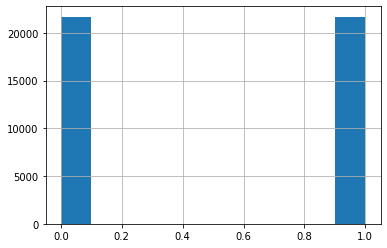

In [ ]:
# undersampling 이후 데이터 현황 파악
new_train_data["target"].hist()

In [ ]:
del new_train_data['id']
del new_train_data['ps_car_03_cat']
del new_train_data['ps_car_05_cat']

## 상관관계 분석

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

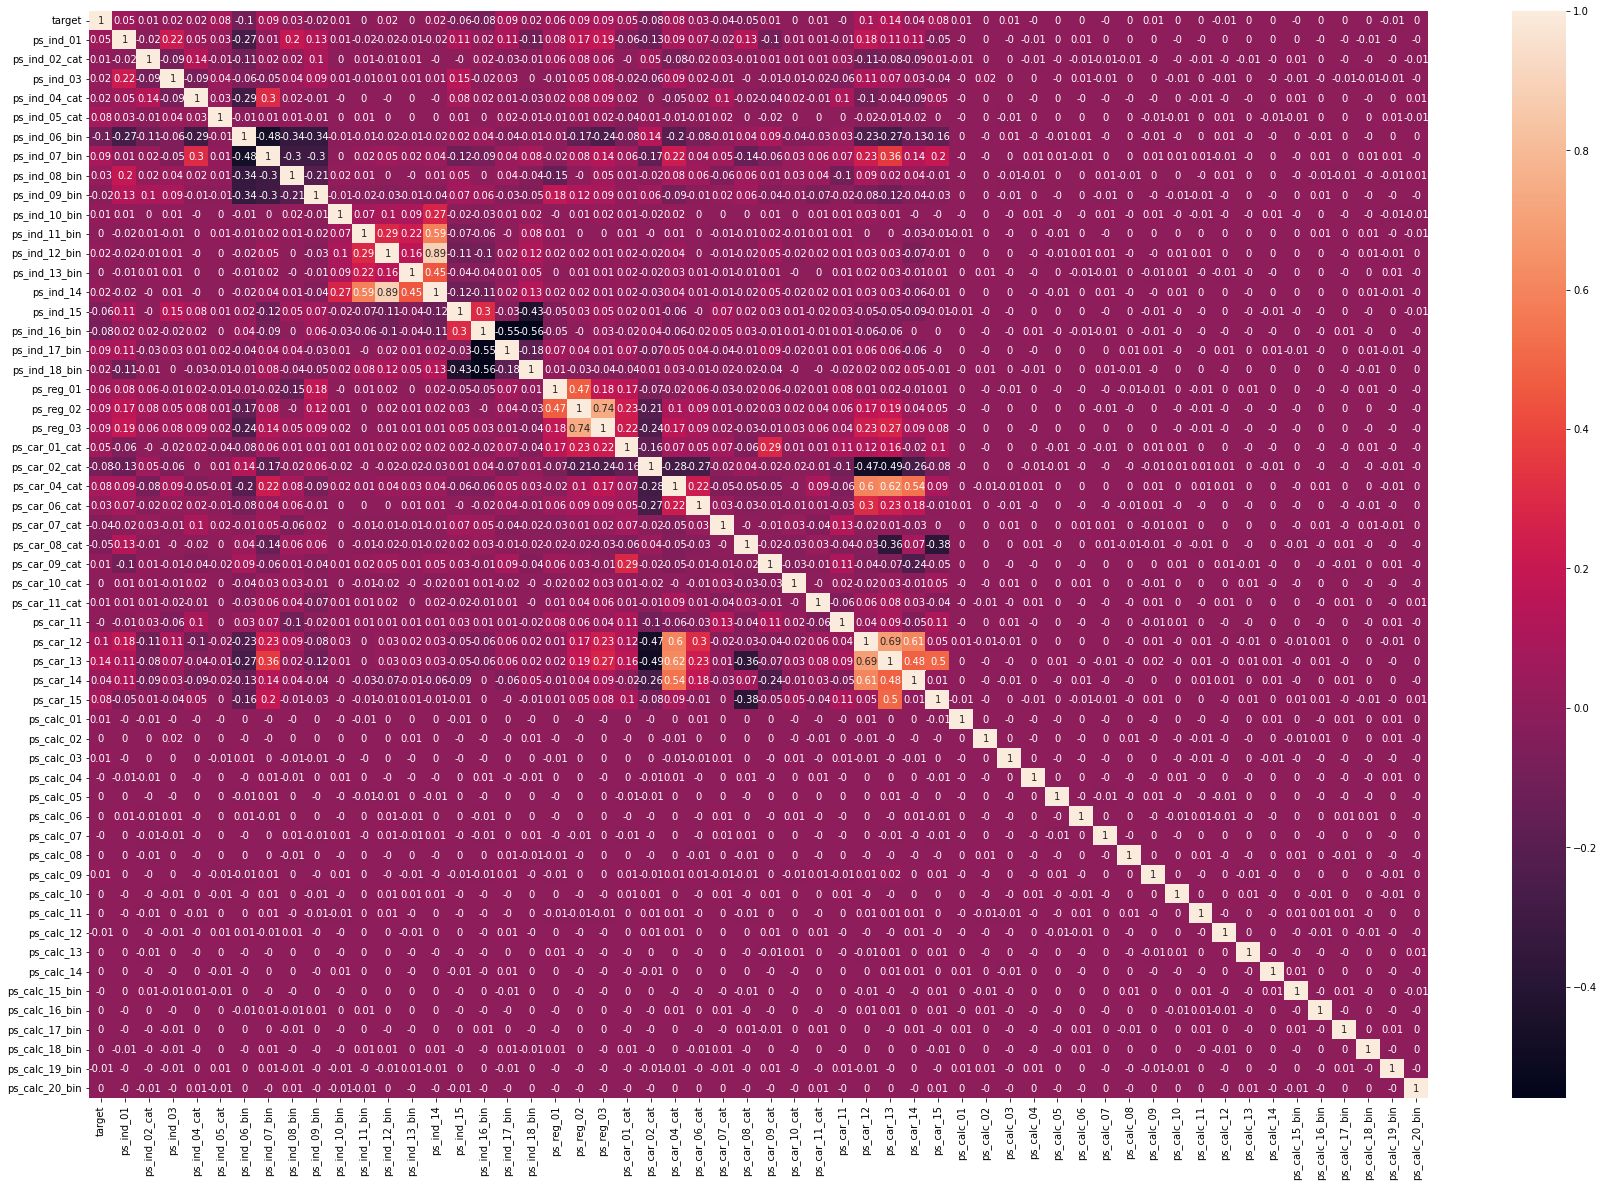

In [ ]:
plt.figure(figsize = (30,20))
corr_mat = new_train_data.corr().round(2)
sns.heatmap(data= corr_mat, annot = True)

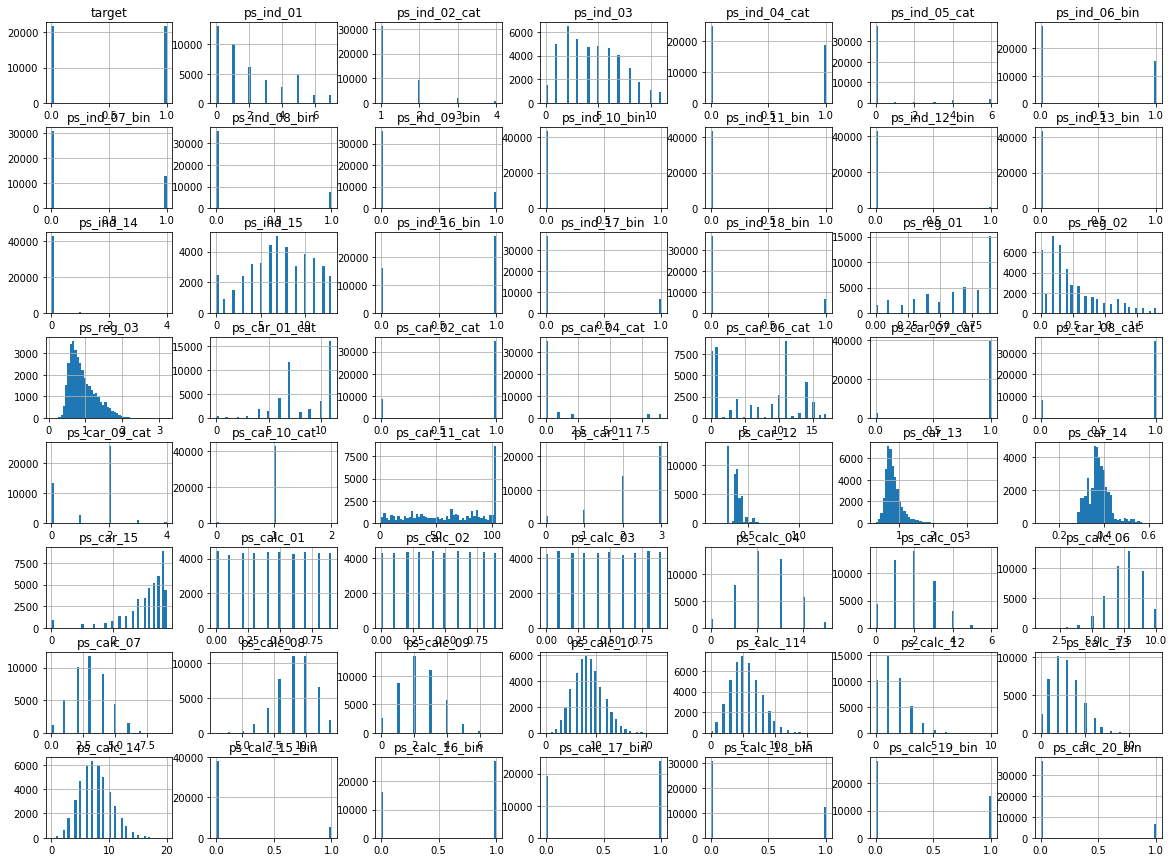

In [ ]:
fig = new_train_data.hist(bins=50, figsize = (20,15))

상관관계 분석 결과
* ps_calc_* 칼럼들은 상관성이 0인 것을 확인.


In [ ]:
# 상관성이 0인 ps_calc_* 칼럼들 모두 삭제
del new_train_data['ps_calc_01']
del new_train_data['ps_calc_02']
del new_train_data['ps_calc_03']
del new_train_data['ps_calc_04']
del new_train_data['ps_calc_05']
del new_train_data['ps_calc_06']
del new_train_data['ps_calc_07']
del new_train_data['ps_calc_08']
del new_train_data['ps_calc_09']
del new_train_data['ps_calc_10']
del new_train_data['ps_calc_11']
del new_train_data['ps_calc_12']
del new_train_data['ps_calc_13']
del new_train_data['ps_calc_14']
del new_train_data['ps_calc_15_bin']
del new_train_data['ps_calc_16_bin']
del new_train_data['ps_calc_17_bin']
del new_train_data['ps_calc_18_bin']
del new_train_data['ps_calc_19_bin']
del new_train_data['ps_calc_20_bin']

상관성 0 칼럼 삭제 후 재검사

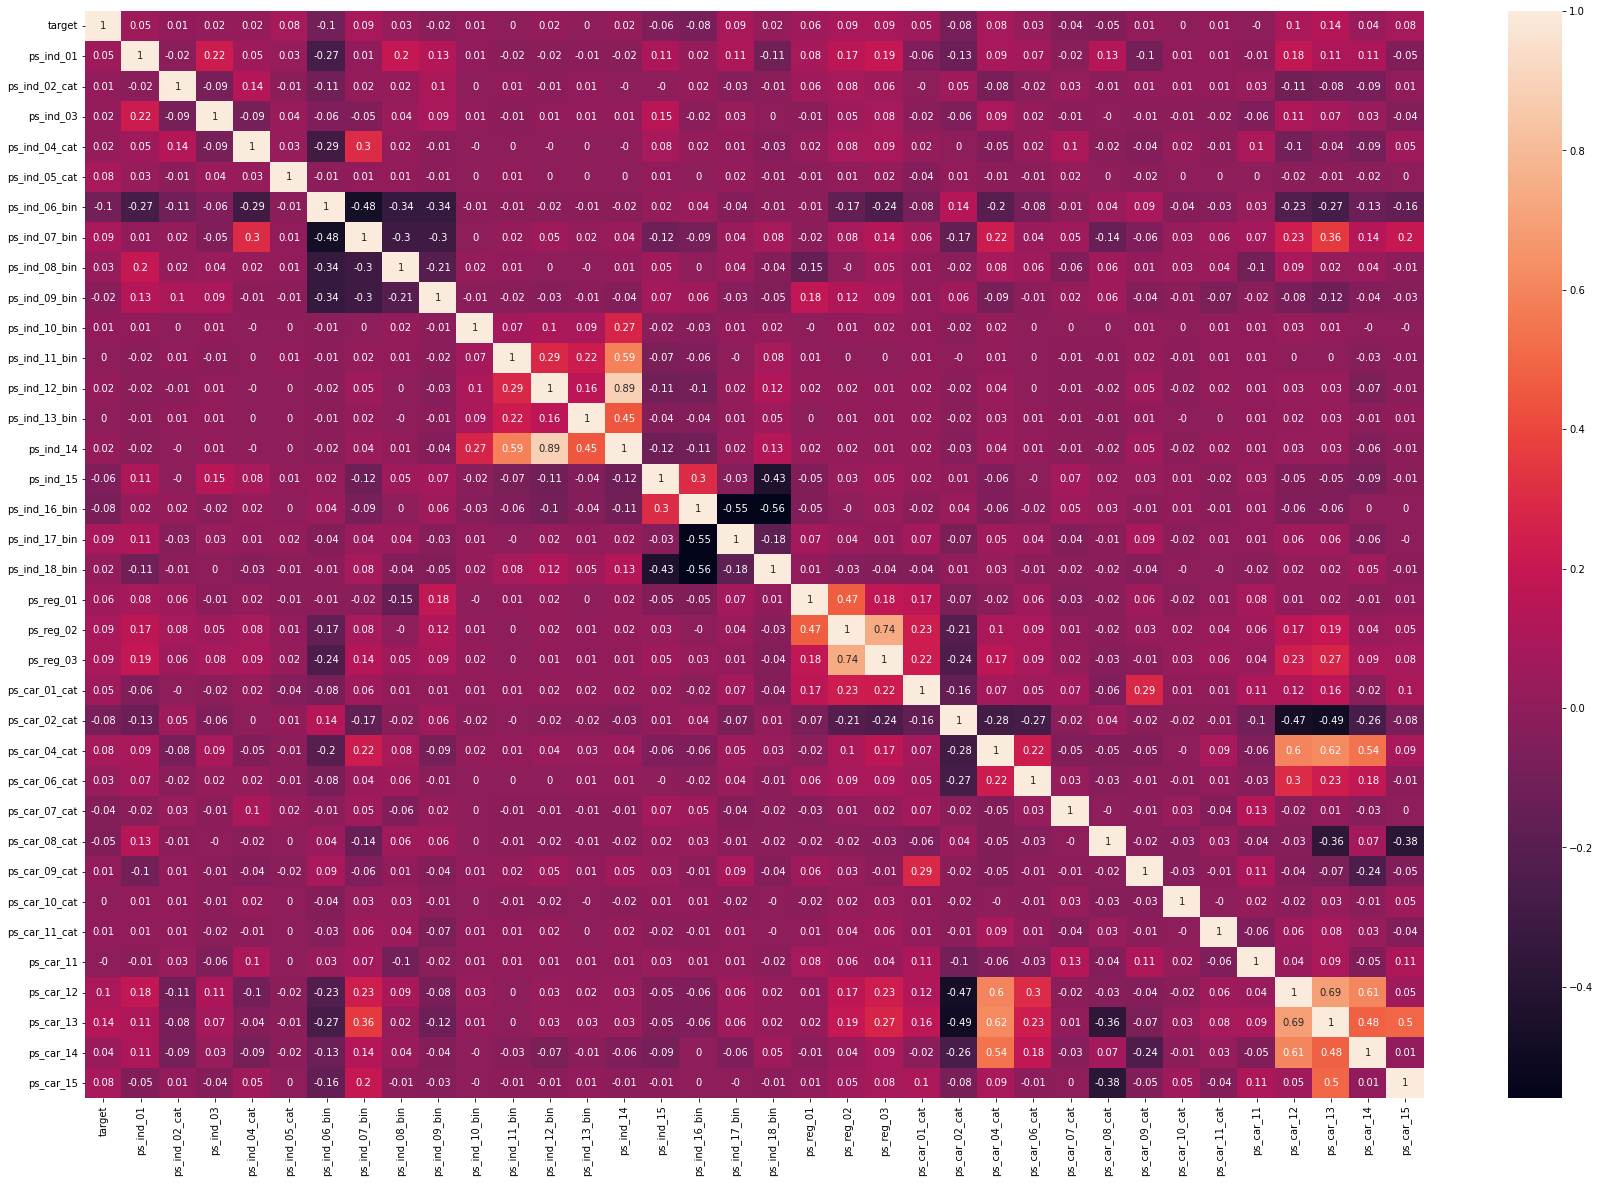

In [ ]:
plt.figure(figsize = (30,20))
corr_mat = new_train_data.corr().round(2)
sns.heatmap(data= corr_mat, annot = True)

## 2. 전처리

In [ ]:
test_data01 = test_data.copy()      # 첫 번째 전처리용 데이터 복사

In [ ]:
# 결측값이 너무 많은 칼럼들과 상관성이 없는 칼럼들 삭제

del test_data01['ps_car_03_cat']
del test_data01['ps_car_05_cat']
del test_data01['ps_calc_01']
del test_data01['ps_calc_02']
del test_data01['ps_calc_03']
del test_data01['ps_calc_04']
del test_data01['ps_calc_05']
del test_data01['ps_calc_06']
del test_data01['ps_calc_07']
del test_data01['ps_calc_08']
del test_data01['ps_calc_09']
del test_data01['ps_calc_10']
del test_data01['ps_calc_11']
del test_data01['ps_calc_12']
del test_data01['ps_calc_13']
del test_data01['ps_calc_14']
del test_data01['ps_calc_15_bin']
del test_data01['ps_calc_16_bin']
del test_data01['ps_calc_17_bin']
del test_data01['ps_calc_18_bin']
del test_data01['ps_calc_19_bin']
del test_data01['ps_calc_20_bin']

##### 2.1 평균값으로 대체

In [ ]:
train_data01 = new_train_data.copy()

고려할 칼럼의 결측값을 평균값으로 대체

In [ ]:
# ps_reg_03 결측값을 해당 column 평균 값으로 대체
train_data01['ps_reg_03'] = train_data01['ps_reg_03'].fillna(train_data01['ps_reg_03'].mean())
train_data01['ps_ind_02_cat'] = train_data01['ps_ind_02_cat'].fillna(train_data01['ps_ind_02_cat'].mean())
train_data01['ps_ind_04_cat'] = train_data01['ps_ind_04_cat'].fillna(train_data01['ps_ind_04_cat'].mean())
train_data01['ps_ind_05_cat'] = train_data01['ps_ind_05_cat'].fillna(train_data01['ps_ind_05_cat'].mean())
train_data01['ps_car_01_cat'] = train_data01['ps_car_01_cat'].fillna(train_data01['ps_car_01_cat'].mean())
train_data01['ps_car_07_cat'] = train_data01['ps_car_07_cat'].fillna(train_data01['ps_car_07_cat'].mean())
train_data01['ps_car_09_cat'] = train_data01['ps_car_09_cat'].fillna(train_data01['ps_car_09_cat'].mean())
train_data01['ps_car_14'] = train_data01['ps_car_14'].fillna(train_data01['ps_car_14'].mean())
train_data01['ps_car_02_cat'] = train_data01['ps_car_02_cat'].fillna(train_data01['ps_car_02_cat'].mean())

In [ ]:
# ps_reg_03,ps_car_03_cat 결측값 삭제
# ps_reg_03 결측값 대체되었음을 확인
train_data01.shape[0] - train_data01.count()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         1
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0


#### 2.2 KNNImputer로 누락값 대체

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1) # 범주형 데이터가 소숫점이 나오면 안되므로 n_neighbors = 1로 설정
train_data02 = imputer.fit_transform(new_train_data)

In [ ]:
train_data02 = pd.DataFrame(train_data02)  # train_data02값이 array로 나와서 dataframe으로 변경
train_data02.columns = new_train_data.columns

In [ ]:
train_data02.isnull().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0


## 3. OneHotEncoding

평균값대체의 onehotencoding입니다!

In [ ]:
train_data01_onehotencoding = train_data01.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
for i in train_data01_onehotencoding.columns:
    if 'cat' in str(i):
        dummy = pd.get_dummies(train_data01_onehotencoding[str(i)])
        train_data01_onehotencoding = pd.concat([train_data01_onehotencoding,dummy],axis = 1)
        train_data01_onehotencoding.drop(i,axis = 1,inplace=True)

knnimputer의 onehotencoding입니다!

In [ ]:
train_data02_onehotencoding = train_data02.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
for i in train_data02_onehotencoding.columns:
    if 'cat' in str(i):
        dummy = pd.get_dummies(train_data02_onehotencoding[str(i)])
        train_data02_onehotencoding = pd.concat([train_data02_onehotencoding,dummy],axis = 1)
        train_data02_onehotencoding.drop(i,axis = 1,inplace=True)

## 4. 모델링 시도

####  4.1 Logistic Regression Test 시도

#### 4.1.1 전체 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X = train_data02.loc[ : , 'ps_ind_01':]
y = train_data02['target']

X_train, X_test2, y_train, y_test2 = train_test_split(X,y, test_size = 0.2)

위 코드에서 마지막줄 : 테스트 데이터에 따로 결과값(target 칼럼)이 없는 관계로 훈련 데이터의 20퍼센트를 테스트용으로 사용

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_all = LogisticRegression()
log_reg_all.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

정확도 검사

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = log_reg_all.predict(X_test2)

accuracy_score(y_pred, y_test2)

0.5831988937543213

## 4.1.2 원핫 인코딩된 데이터로 모델링

#### 1. 데이터 분리

In [ ]:
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.svm import SVC # support vector machine

from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

X= train_data02_onehotencoding.drop('target',axis = 1)
y = train_data02_onehotencoding['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## 5. 가장 적합한 모델 선정

#### 5.1 soft voting
* 예측 확률을 더해 평균을 내고, 더 높을 확률의 예측을 최종 결과값으로 선정

In [ ]:
# weak learner
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability= True, random_state=42) # SVC가 predict_proba 함수를 제공하지 않음, 대신 probability= True 로 세팅
# voting classifier
voting_clf = VotingClassifier(
    estimators= [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],  # estimators= [("이름", 분류기1), ("이름", 분류기2),  .....]
    voting ="soft"
)
from sklearn.metrics import accuracy_score # 정확도

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  # 학습
  clf.fit(X_train, y_train)
  # 예측
  predict = clf.predict(X_test)
  # 성능평가
  accuracy = accuracy_score(y_test, predict)  # 정확도 함수, 파라미터 : 정답, 예측
  # 출력
  print(clf.__class__.__name__, accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  Future

LogisticRegression 0.5858492740262733


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier 0.5812399170315741


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC 0.5971421986632864


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  Future

VotingClassifier 0.5965660290389491


## 5.2 hard voting
* 예측 결과값을 다수결로 결정

In [ ]:
# weak learner
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
# voting classifier
voting_clf = VotingClassifier(
    estimators= [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],  # estimators= [("이름", 분류기1), ("이름", 분류기2),  .....]
    voting ="hard"
)
 # 정확도

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  # 학습
  clf.fit(X_train, y_train)
  # 예측
  predict = clf.predict(X_test)
  # 성능평가
  accuracy = accuracy_score(y_test, predict)  # 정확도 함수, 파라미터 : 정답, 예측
  # 출력
  print(clf.__class__.__name__, accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  Future

LogisticRegression 0.5858492740262733


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier 0.5812399170315741


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


SVC 0.5971421986632864


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  Future

VotingClassifier 0.5954136897902742


Hard voting 과 Soft voting의 차이가 별로 없었으며, Random Forest 모델의 성능이 가장 좋게 나타남

이후 전처리 결과에 따른 성능 비교는 Random Forest 모델을 기준으로 진행

랜덤포레스트 모델을 그리드서치

* 관련성 있는 파라미터들의 모든 조합을 시도하여, 최적의 파라미터를 찾는 방법



- Train_data01_onehotencoding 이용

In [ ]:
from sklearn.model_selection import train_test_split

X1 = train_data01_onehotencoding.drop('target',axis = 1)
y1 = train_data01_onehotencoding['target']

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2)

In [ ]:
X1_train_01_onehot = X1_train.copy()
y1_train_01_onehot = y1_train.copy()
X1_test_01_onehot = X1_test.copy()
y1_test_01_onehot = y1_test.copy()

from sklearn.model_selection import GridSearchCV
param_grid =[
    {"n_estimators" : [30,40,50], "max_features" : [10,20,30,40,50,60,70]}
    
]
forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X1_train_01_onehot, y1_train_01_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [10, 20, 30, 40, 50, 60, 70],
                          'n_estimators': [30, 40, 50]}])

In [ ]:
print(grid_search.best_estimator_)  # 가장 좋은 파라미터 확인
print(grid_search.best_score_)   # 예측성능

RandomForestClassifier(max_features=30, n_estimators=50, random_state=42)
0.5817055603572457


- Train_data02_onehotencoding 이용

In [ ]:
from sklearn.model_selection import train_test_split

X2 = train_data02_onehotencoding.drop('target',axis = 1)
y2 = train_data02_onehotencoding['target']

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2)

In [ ]:
X2_train_02_onehot = X2_train.copy()
y2_train_02_onehot = y2_train.copy()
X2_test_02_onehot = X2_test.copy()
y2_test_02_onehot = y2_test.copy()

from sklearn.model_selection import GridSearchCV
param_grid =[
    {"n_estimators" : [30,40,50], "max_features" : [10,20,30,40,50,60,70]}
    
]
forest_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X2_train_02_onehot, y2_train_02_onehot)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [10, 20, 30, 40, 50, 60, 70],
                          'n_estimators': [30, 40, 50]}])

In [ ]:
print(grid_search.best_estimator_)  # 가장 좋은 파라미터 확인
print(grid_search.best_score_)   # 예측성능

RandomForestClassifier(max_features=30, n_estimators=50, random_state=42)
0.5826274848746759


## 6. 진행 & 개선 사항

1. 데이터 탐색 -> Target data의 Class 불균형 파악
2. Under Sampling 진행
3. 상관관계 분석
4. 상관관계가 0인 Column : ps_calc 1~20 삭제,    결측값이 40% 이상 존재하는 Column : ps_car_03_cat,ps_car_05_cat 삭제
5. 데이터 전처리 -> 평균값 대체, KNNImputer를 통한 결측값 대체
6. Catergorical Data One Hot Encoding 진행
7. Train Data를 통한 모델 성능 비교 : logistic regression, Random Forest(성능이 가장 우수), SVM


- 지니계수 활용
- 성능 평가 ( 시간이 너무 오래 걸려서 진행하지 않음 )

## 7. 참고자료

코드 분석 스터디 Porto Seguro's Safe Driver Prediction 캐글 커널 필사 : https://kubig-2021-2.tistory.com/38  

결측값의 개념, 결측값이 미치는 영향 : https://gooopy.tistory.com/42  
결측치 처리 7가지 방법 : https://daebaq27.tistory.com/43  
불균형 데이터 처리를 위한 샘플링 기법 : https://casa-de-feel.tistory.com/15  
데이터 불균형 문제를 대하는 법 - Sampling 방법론 : https://chealin93.tistory.com/122  
파이썬으로 표본 추출하기 : https://lovelydiary.tistory.com/410  
지니계수 위키 : https://ko.wikipedia.org/wiki/  %EC%A7%80%EB%8B%88_%EA%B3%84%EC%88%98  
Porto Seguro Lazy Predict를 사용한 캐글 커널 : https://www.kaggle.com/code/gauravduttakiit/porto-seguro-s-safe-driver-prediction-lazy-predict  
[Lazy Predict] 분류, 회귀분석 간소화 프로젝트 : https://bourbonkk.tistory.com/113  
지니계수 : https://leedakyeong.tistory.com/entry/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4Decision-Tree-CART-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%A7%80%EB%8B%88%EA%B3%84%EC%88%98Gini-Index%EB%9E%80  
